In [137]:
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import pymatgen.electronic_structure.bandstructure as bandstr

import numpy as np

with MPRester("v5zOFTlhqtoyEiw1") as m:
    material_id = "mp-753260"
    # Structure for material id
    bandstructure = m.get_bandstructure_by_material_id(material_id)
    stucture = m.get_structure_by_material_id(material_id)
    
    # 1) get the information for the indirect band gap
    bandgap = bandstructure.get_band_gap()
    print('direct band gap :', bandgap['direct'])
    print('energy of the band gap :', bandgap['energy'] , '[eV]')
    print('transition between k-points :', bandgap['transition'] )

direct band gap : False
energy of the band gap : 2.8266999999999998 [eV]
transition between k-points : L-\Gamma


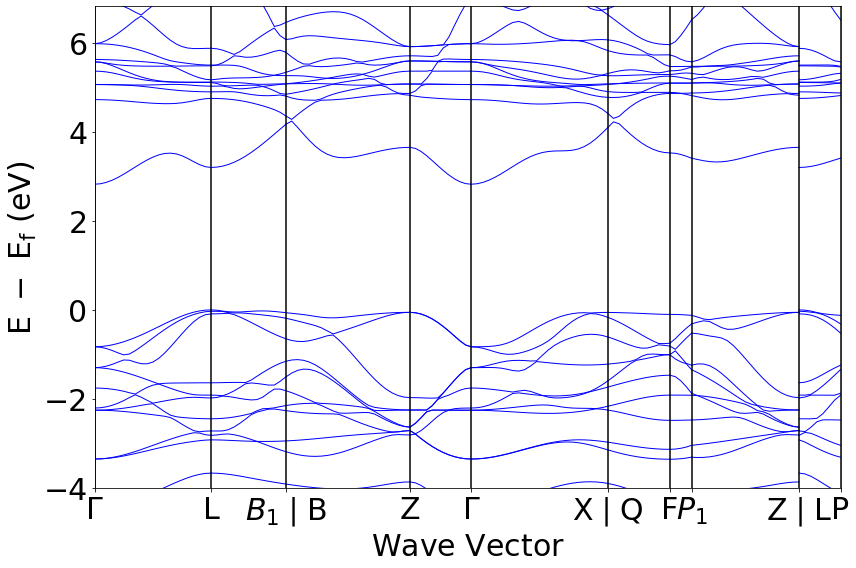

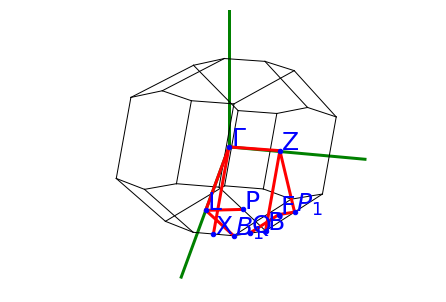

In [138]:
plotter = BSPlotter(bandstructure)
plotter.get_plot()
plotter.get_ticks()
plotter.plot_brillouin()
plotter.save_plot("bandstructure.pdf", img_format='pdf', ylim=None, zero_to_efermi=True, smooth=False)


In [139]:
# 2)information about the last valence band
vbm = bandstructure.get_vbm()
print("the index of the vbm :" , vbm['band_index'])
#kpoint of the vbm : information over the direction with the min/max dispersion
#a) min dispersion
kpointvbm = vbm['kpoint']
print("\n")
print('maximal dispersion \n' )
print('the label of the kpoint is : ',kpointvbm.label)
print('the fractionnal coordinates of the kpoint are :', kpointvbm.frac_coords)
print('the cartesian coordinates of the kpoint are :', kpointvbm.cart_coords)
print('energy at the k point: ', vbm['energy'], '[eV]')
#I have not found the minimal dispersion


the index of the vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


maximal dispersion 

the label of the kpoint is :  L
the fractionnal coordinates of the kpoint are : [0.5 0.  0. ]
the cartesian coordinates of the kpoint are : [ 0.24820578 -0.81883872 -0.43604862]
energy at the k point:  2.5163 [eV]


In [140]:
# 3)information about the first conduction band
cbm = bandstructure.get_cbm()
print("the index of the cbm :" ,cbm['band_index'])
#kpoint of the vbm : information over the direction with the min/max dispersion
#a) min dispersion
kpointcbm = cbm['kpoint']
print("\n")
print('minimal dispersion \n' )
print('the label of the kpoint is : ',kpointcbm.label)
print('the fractionnal coordinates of the kpoint are :', kpointcbm.frac_coords)
print('the cartesian coordinates of the kpoint are :', kpointcbm.cart_coords)
print('energy at the k point: ', cbm['energy'], '[eV]')
#I have no found the maximal dispersion

the index of the cbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})


minimal dispersion 

the label of the kpoint is :  \Gamma
the fractionnal coordinates of the kpoint are : [0. 0. 0.]
the cartesian coordinates of the kpoint are : [0. 0. 0.]
energy at the k point:  5.343 [eV]


In [141]:
#effective mass wee know that E_k = h_bar**2 *k**2/(2*m_eff). Thus m_eff = h_bar**2 *k**2/(2*E_k)
# 4) a) effective mass of the summit of the last valence band at the summit
h_bar = 6.582119569e-16 #eV*s
k = np.linalg.norm(kpointvbm.cart_coords)
E_k = vbm['energy']
m_eff_h =  h_bar**2 *k**2/(2*E_k) # h for hole
print('the effective mass (assuming parabolic dispersion) on the summmit of vbm is:', m_eff_h ,'[kg]' )

the effective mass (assuming parabolic dispersion) on the summmit of vbm is: 7.939327396430103e-32 [kg]


In [142]:
# 5) effective mass of the summit of the first conduction band at the base
#in point I found the k point for the minimal dispersion to be [0,0,0]. This is a problem as it would mean 0 mass
#instead , I calculate the effective mass at the same kpoint corresponding to the summit of the last valence band but we take the energy of the abse of the cbm:

k = np.linalg.norm(kpointvbm.cart_coords)
E_k = cbm['energy']
m_eff_e =  h_bar**2 *k**2/(2*E_k) #e for electron
print('the effective mass (assuming parabolic dispersion) on a kpoint of the cbm is:', m_eff_e ,'[kg]' )


the effective mass (assuming parabolic dispersion) on a kpoint of the cbm is: 3.7390472632672785e-32 [kg]


In [143]:
# 6) we can do a ratio between the effective mass with a hole and the effective mass with an electron :

print('this ratio is between the effective mass with a electron over the effective mass with an electron is :', m_eff_e/m_eff_h )

this ratio is between the effective mass with a electron over the effective mass with an electron is : 0.4709526483249111
